In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AR
from numpy import mean
from sklearn.metrics import mean_squared_error

import statsmodels
from math import sqrt

In [36]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [37]:
no2 = pd.read_csv('data/NO2.csv')
print(no2.head(2))

              datetime  NO2 (Biossido di azoto)
0  2020-01-01 00:00:00                     16.0
1   2020-01-01 1:00:00                     26.0


In [38]:
no2['datetime'] = pd.to_datetime(no2['datetime'])

In [64]:
series = no2['NO2 (Biossido di azoto)']
# split dataset
prediction_period = 40
X = series.values
train, test = X[1:(len(X)- prediction_period)], X[len(X)-prediction_period:]

In [65]:
print(len(train))
print(len(test))

6894
40


In [66]:
# train autoregression
model = statsmodels.tsa.ar_model.AutoReg(train, lags = 48)
model_fit = model.fit()
print('Lag: %s' % model_fit)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x28381fbb0>
Coefficients: [ 5.80397964e-01  1.09561735e+00 -3.90389636e-01  1.24794763e-01
 -2.63112763e-02  1.14279594e-02  2.70215623e-02 -2.07122723e-02
  1.63534142e-02 -1.15578691e-02  1.54616396e-02  2.21956773e-02
  2.25977786e-02 -7.48595945e-03 -1.27851367e-03 -2.32929069e-02
  1.06152747e-02 -1.68480828e-02 -1.56721674e-02  2.34694553e-02
  9.24605331e-03 -9.18865468e-03  1.37016928e-02  7.50927919e-02
  6.35730900e-02 -1.77572896e-02 -4.91468859e-02 -1.55560507e-02
  5.26511970e-03 -2.32179426e-02  7.21763776e-03  3.90508053e-03
 -6.01069861e-04  1.04609381e-02  1.61546803e-02 -5.46333940e-03
 -2.83851938e-03  8.98059086e-03  3.82209140e-03 -1.04087650e-02
 -2.90563915e-02  4.11474657e-02  1.48962783e-03 -4.58488862e-02
  2.74128043e-02 -3.99227512e-03 -1.88000713e-02  1.00287594e-01
 -3.87392849e-02]


In [67]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=72.082100, expected=75.000000
predicted=60.025057, expected=60.000000
predicted=51.694053, expected=55.000000
predicted=46.710820, expected=48.000000
predicted=43.399236, expected=47.000000
predicted=41.054087, expected=52.000000
predicted=40.986650, expected=35.000000
predicted=43.685048, expected=38.000000
predicted=49.433292, expected=65.000000
predicted=57.023677, expected=75.000000
predicted=61.818545, expected=74.000000
predicted=60.353543, expected=51.000000
predicted=52.970336, expected=48.000000
predicted=43.863753, expected=52.000000
predicted=36.648931, expected=49.000000
predicted=31.939030, expected=38.000000
predicted=29.124719, expected=27.000000
predicted=29.304553, expected=26.000000
predicted=31.276624, expected=23.000000
predicted=34.058020, expected=16.000000
predicted=39.159836, expected=30.000000
predicted=46.536517, expected=50.000000
predicted=52.541421, expected=55.000000
predicted=54.451463, expected=45.000000
predicted=50.841850, expected=29.000000


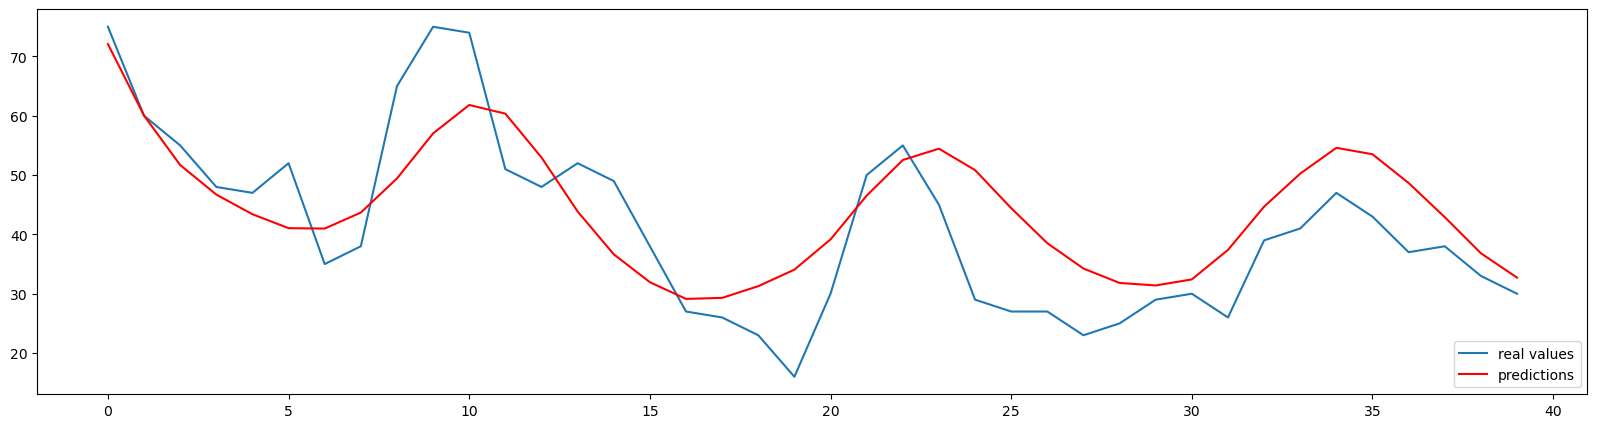

In [70]:
# plot results
plt.figure(figsize=(20, 5))
# Function add a legend  

plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(["real values", "predictions"], loc ="lower right")
plt.show()

### Compute the forecasting error

-  the performance measures provide a summary of the skill and capability of the model to make good predictions. 


-  there are many different performance measures, it depends on what you want to measure. 


-  confusing to know which measure to use and how to interpret the results. 



#### The most common forecasting performance measures are : 

-  MAE (Mean Absolute Error) 

-  RMSE (Root Mean Squared Error)

-  MPE (Mean Percentage Error)

-  MAPE (Mean Absolute Percentage Error)

In [71]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.488


In [72]:
import os

In [73]:
os.getcwd()

'/Users/alket/Desktop/BooksAndApps/PreplyStudents/TimeSeriesAnalysis'